In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la

from src.structured_random_features.src.models.weights import V1_weights

# Packages for fft and fitting data
from scipy import fftpack as fft
from sklearn.linear_model import Lasso

# Package for importing image representation
from PIL import Image, ImageOps

from src.V1_Compress import generate_Y, compress
import pandas as pd
import itertools
import dask
from dask.distributed import Client, progress
import seaborn as sns
import time
import os.path

In [9]:
## Check if this function is applicable to regular compress sensing
compress_img = Image.open("image/tree_part1.jpg")
compress_img = ImageOps.grayscale(compress_img)
compress_arr = np.asarray(compress_img)
cn, cm = compress_arr.shape
print(cn, cm)
compress_samp = 500 #np.floor (cn * cm * 0.20).astype(int)
alpha = np.logspace(-3, 3, 7)
rep = np.arange(10)
params = []
results = []

# List to make combination of
search_list = {'repetition': rep,
               'alpha': alpha
              }



# Get repetition * alpha combination amount of result
for row in itertools.product(*search_list.values()):
    product = dict(zip(search_list.keys(), row))
    rep, alp = product.values()
    
    rand_index = np.random.randint(0, cn * cm, compress_samp)
    compress_Y = compress_arr.flatten()[rand_index]
    compress_Y = compress_Y.reshape(compress_samp, 1)

    # Generate C matrix
    C = np.eye(cn * cm)[rand_index, :]
    C3D = C.reshape(compress_samp, cn, cm)
    theta, compress_reform, s = compress(C3D, compress_Y, alp)
    
    error = np.linalg.norm(compress_img - compress_reform, 'fro') / np.sqrt(cm*cn)
    
    params.append({'alpha' : alp,
                   'repetition' : rep,
                   'error' : error
                  })
    results.append({'s' : s,
                    'theta' : theta,
                    'reform' : compress_reform,
                   })

30 30


In [16]:
save_path = os.path.join('./result/')

compress_param_df = pd.DataFrame(params)
compress_param_df.to_csv(os.path.join(save_path, "Compress_param_" + "_".join(str.split(time.ctime().replace(":", "_"))) + ".csv"))

In [18]:
compress_param_df_aug = compress_param_df.groupby('alpha').mean().drop('repetition', axis=1) #  sort_values('error', ascending=True).head()
compress_param_df_aug

,error
alpha,
0.001,136.947511
0.010,136.939150
0.100,137.990362
1.000,144.029095
10.000,145.781640
100.000,145.781640
1000.000,145.781640


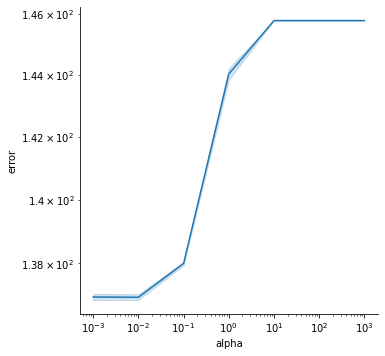

In [28]:
compress_fig = sns.relplot(data = compress_param_df, x = 'alpha', y = 'error', kind= 'line')
fig.set(yscale='log')
fig.set(xscale='log')

In [29]:
alpha

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])